https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
데이터를 다운받아 csv파일로 확장자 변환 후 레이블을 붙이고 결측치를 제거해야함

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
#구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [21]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CancerPrediction/data.csv')

data.head() #데이터 중 앞부분 5개만 출력

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
data.tail() #데이터 중 뒷부분 5개만 출력(총 569개)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN




1.   데이터 프레임에 있는 데이터를 확인해보면 종양의 크기과 모양에 관한 속성들이 숫자형태로 들어있음
2.   타깃 값인 diagnosis는 문자형태로 들어있음


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Refine Dataset

In [24]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

'''
Benign: 양성 (0)
Malignant: 악성 (1)
'''
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


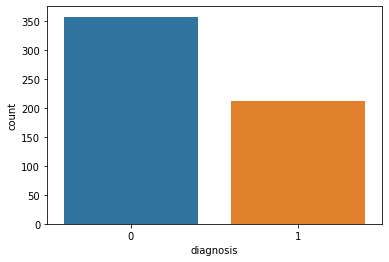

In [26]:
sns.countplot(data['diagnosis'])

# Split Train and Test(훈련데이터와 테스트 데이터 나누기)

전체 데이터 569개 중 8:2로 훈련데이터와 테스트 데이어를 나눔

In [27]:
train, test = train_test_split(data, test_size=0.2, random_state=2019) #test_size 비율에 따라 달라짐

x_train = train.drop(['diagnosis'], axis=1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'], axis=1)
y_test = test.diagnosis

print(len(train), len(test))

455 114


# SVM(서포트 벡터 머신은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델-유클리드 기하학과 최적화 이론)

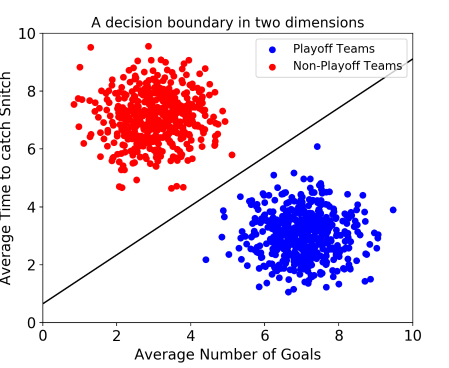

In [28]:
model = svm.SVC(gamma='scale')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

SVM: 91.23


# DecisionTreeClassifier(결정트리 - 데이터에 있는 규칙을 통해 데이터셋을 분류/예측하는 지도학습)

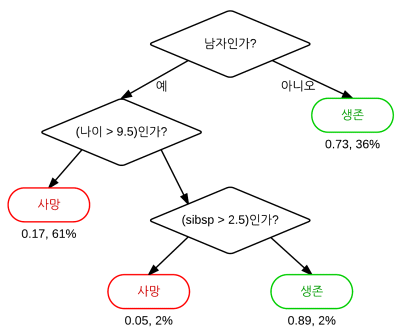

In [29]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

DecisionTreeClassifier: 90.35


# KNeighborsClassifier
새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 k개 이웃의 정보로 새로운 데이터를 예측

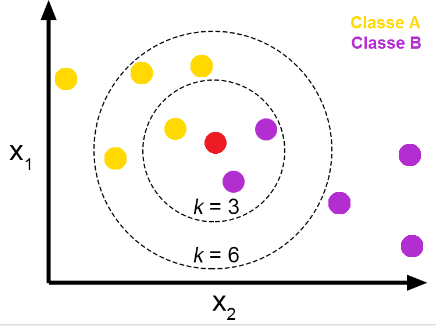

In [30]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('KNeighborsClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

KNeighborsClassifier: 92.98


# LogisticRegression(선형회귀)
종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계 모델

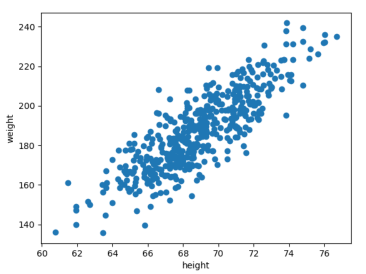

In [31]:
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('LogisticRegression: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

LogisticRegression: 94.74


# RandomForestClassifier
(“무작위 숲”이라는 이름처럼) 훈련을 통해 구성해놓은 다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는, 일종의 인기 투표(?) 같은 것

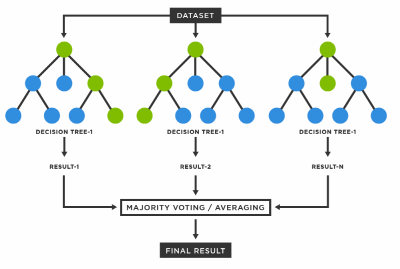

In [32]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

RandomForestClassifier: 95.61


# Compute Feature Importances

In [33]:
features = pd.Series(
    model.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

print(features)

concave points_worst       0.143678
perimeter_worst            0.142151
concave points_mean        0.111150
area_worst                 0.105752
radius_worst               0.077034
perimeter_mean             0.063057
area_mean                  0.055496
radius_mean                0.054686
area_se                    0.038928
concavity_worst            0.038041
concavity_mean             0.037848
perimeter_se               0.013365
smoothness_worst           0.011775
radius_se                  0.010241
texture_mean               0.010139
compactness_worst          0.010026
texture_worst              0.008985
compactness_mean           0.008841
symmetry_worst             0.008374
fractal_dimension_worst    0.008020
concavity_se               0.005214
compactness_se             0.004924
smoothness_mean            0.004839
fractal_dimension_mean     0.004623
symmetry_se                0.004317
texture_se                 0.004059
fractal_dimension_se       0.003864
symmetry_mean              0

# Extract Top 5 Features

In [34]:
top_5_features = features.keys()[:5]

print(top_5_features)

Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'area_worst', 'radius_worst'],
      dtype='object')


# SVM (Top 5)

In [35]:
model = svm.SVC(gamma='scale')
model.fit(x_train[top_5_features], y_train)

y_pred = model.predict(x_test[top_5_features])

print('SVM(Top 5): %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

SVM(Top 5): 91.23


# Cross Validaiton (교차검증)
모델 학습 시 데이터를 훈련용과 검증용으로 교차하여 선택하는 방법

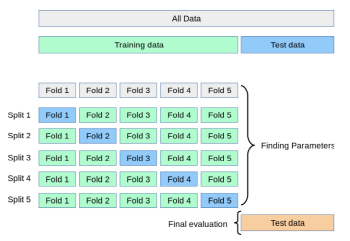

In [37]:
model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5,  shuffle=True)

accs = cross_val_score(model, data[top_5_features], data.diagnosis, cv=cv)

print(accs)

[0.90350877 0.89473684 0.86842105 0.96491228 0.92920354]


# Test All Models

In [40]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5,  shuffle=True)

for name, model in models.items():
    scores = cross_val_score(model, data[top_5_features], data.diagnosis, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

SVM: 91.75%
DecisionTreeClassifier: 90.86%
KNeighborsClassifier: 90.16%
LogisticRegression: 91.56%
RandomForestClassifier: 94.20%


# Normalize Dataset
정규화(normalization)
정규화는 값의 범위를 0과 1사이로 옮겨준다. 모든 데이터의 단위가 모두 0~1사이로 옮겨지게 해주는 것이다.

이러면 데이터의 컬럼들이 평등하게 0~1사이로 놓여지기 때문에 기계가 학습하기에 어느 컬럼에 중점을 두고 학습하기보단 평등하게 컬럼들을 보고 학습시킨다.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[top_5_features])

models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5,  shuffle=True)

for name, model in models.items():
    scores = cross_val_score(model, scaled_data, data.diagnosis, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

SVM: 94.55%
DecisionTreeClassifier: 90.51%
KNeighborsClassifier: 94.37%
LogisticRegression: 94.38%
RandomForestClassifier: 94.73%
